In [1]:
install.packages("readr")
library(readr)

install.packages("dplyr")
library(dplyr)

Instalowanie pakietu w 'C:/Users/karol/AppData/Local/R/win-library/4.5'
(ponieważ 'lib' nie jest określony)



pakiet 'readr' został pomyślnie rozpakowany oraz sumy MD5 zostały sprawdzone

Pobrane pakiety binarne są w
	C:\Users\karol\AppData\Local\Temp\RtmpicuTCZ\downloaded_packages


Instalowanie pakietu w 'C:/Users/karol/AppData/Local/R/win-library/4.5'
(ponieważ 'lib' nie jest określony)



pakiet 'dplyr' został pomyślnie rozpakowany oraz sumy MD5 zostały sprawdzone

Pobrane pakiety binarne są w
	C:\Users\karol\AppData\Local\Temp\RtmpicuTCZ\downloaded_packages



Dołączanie pakietu: 'dplyr'


Następujące obiekty zostały zakryte z 'package:stats':

    filter, lag


Następujące obiekty zostały zakryte z 'package:base':

    intersect, setdiff, setequal, union




**Funkacja convert, która zamienia separator dziesiętny na przecinek oraz typ zmiennej numeric na intiger**

In [2]:
convert_commas_to_dots <- function(df) {
  # Zamiana przecinków na kropki w kolumnach typu
  #character tylko jeśli zawierają przecinek
  df[] <- lapply(df, function(x) {
    if (is.character(x) && any(grepl(",", x))) {
      x <- gsub(",", ".", x)
      num_x <- suppressWarnings(as.numeric(x))
      if (all(is.na(num_x) & !is.na(x))) {
        return(x) # Jeśli wszystkie wartości stają się NA, pozostaw jako tekst
      } else {
        return(num_x) # Konwersja na numeric, jeśli możliwe
      }
    } else {
      return(x)
    }
  })
  return(df)
}

convert_numeric_to_integer <- function(df) {

  #Zamiana wartości na integer, jeśli nie zawierają
  #kropki i nie są wszystkimi NA 

  df[] <- lapply(df, function(x) {
    if (is.numeric(x) && all(!grepl("\\.", as.character(x)), na.rm = TRUE)) { # nolint
      return(as.integer(x))
    } else {
      return(x)
    }
  })
  return(df)
}

In [3]:
convert <- function(df) {
  df <- convert_commas_to_dots(df)
  df <- convert_numeric_to_integer(df)
  return(df)
}

**Zaczytanie danych**

Błędy w zaczytywanych danych: 
- teams.csv ma podublowane rekordy, gdzie połowa z nuch jest niepoprawna. Należy usunąć wiersze, gdzie TM_TAG != TM_NAME
- teams.csv ma błędne ilości minut. Większość wartości w kolumnie MIN jest równa 200 (lub 225, 250, 300 w zależności od ilości dogrywek), gdyż zostały zsumowane z tabeli players.csv przez autora danych. Należy podzielić kolumnę MIN przez 5. 
- niespójność w players.csv. Część rekordów jest pomimo tego, że MIN = 0, co oznacza, że zawodnik nie wystąpił w meczu. Natomiast widać, że części rekordów nie ma, gdyż część zawodników ma mniejszą ilość rozegranych gier. Trzeba usunąć rekordy, gdzie MIN = 0, gdyż rodzi to problem przy zliczaniu ilości game played oraz liczeniu średniej. 

In [4]:
teams <- read_csv2("teams.csv")
players <- read_csv2("players.csv")

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 1324 Columns: 133
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (13): TM TAG, OPP TAG, TM NAME, OPP NAME, DATE, H/A, W/L, RIM PPS, MID ...
dbl (120): ROUND, MIN, PTS, 2PTM, 2PTA, 2PT%, 3PTM, 3PTA, 3PT%, FGM, FGA, FG...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 7883 Columns: 85
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (14): TM TAG, NAME, ROLE, NAT, HEIGHT, TM NAME, OPP NAME, DATE, H/A, W/L...
dbl (71): AGE, ROUND, MIN, PTS, 2PTM, 2PTA, 3PTM, 3PTA, FGM, FGA, FTM, FTA, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or s

**Konwersja danych**

In [5]:
teams <- convert(teams)
glimpse(teams)

Rows: 1,324
Columns: 133
$ ROUND              <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ `TM TAG`           <chr> "CZB", "ASV", "MTA", "PAR", "EFE", "FCB", "BER", "B…
$ `OPP TAG`          <chr> "ASV", "CZB", "PAR", "MTA", "FCB", "EFE", "BAY", "B…
$ `TM NAME`          <chr> "Crvena Zvezda Meridianbet Belgrade", "LDLC ASVEL V…
$ `OPP NAME`         <chr> "LDLC ASVEL Villeurbanne", "Crvena Zvezda Meridianb…
$ DATE               <chr> "05.10.2023", "05.10.2023", "05.10.2023", "05.10.20…
$ `H/A`              <chr> "H", "A", "H", "A", "A", "H", "A", "H", "H", "A", "…
$ `W/L`              <chr> "W", "L", "W", "L", "L", "W", "L", "W", "L", "W", "…
$ MIN                <int> 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 2…
$ PTS                <int> 94, 73, 96, 81, 74, 91, 68, 80, 79, 82, 82, 85, 88,…
$ `2PTM`             <int> 16, 17, 27, 26, 22, 32, 16, 23, 23, 18, 18, 18, 19,…
$ `2PTA`             <int> 37, 29, 43, 39, 40, 42, 30, 36, 39, 39, 36, 34, 35,…
$ `2PT%`       

In [6]:
players <- convert(players)
glimpse(players)

Rows: 7,883
Columns: 85
$ `TM TAG`       <chr> "CZB", "CZB", "CZB", "CZB", "CZB", "CZB", "CZB", "CZB",…
$ NAME           <chr> "Adam Hanga", "Branko Lazic", "Dalibor Ilic", "Luka Mit…
$ ROLE           <chr> "F", "SG", "F", "PF", "PF", "C", "PG", "SG", "C", "F/PF…
$ NAT            <chr> "HUN", "SRB", "BIH", "SRB", "SRB", "USA", "SRB", "SRB",…
$ HEIGHT         <chr> "201", "195", "206", "206", "203", "213", "195", "191",…
$ AGE            <int> 35, 35, 24, 31, 38, 30, 37, 33, 34, 32, 33, 28, 30, 35,…
$ ROUND          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ `TM NAME`      <chr> "Crvena Zvezda Meridianbet Belgrade", "Crvena Zvezda Me…
$ `OPP NAME`     <chr> "LDLC ASVEL Villeurbanne", "LDLC ASVEL Villeurbanne", "…
$ DATE           <chr> "05.10.2023", "05.10.2023", "05.10.2023", "05.10.2023",…
$ `H/A`          <chr> "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", …
$ `W/L`          <chr> "W", "W", "W", "W", "W", "W", "W", "W", "W", "W", "W", …
$ MIN           

In [7]:
# Podział danych na poszczególne etapy rozgrywek
# Dla zespołów
teams_regular_raw <- teams %>% filter(ROUND <= 34)
teams_playin_raw <- teams %>% filter(ROUND >= 35 & ROUND <= 36)
teams_playoff_raw <- teams %>% filter(ROUND >= 37 & ROUND <= 41)
teams_final4_raw  <- teams %>% filter(ROUND >= 42 & ROUND <= 43)

# Dla zawodników
players_regular <- players %>% filter(ROUND <= 34)
players_playin  <- players %>% filter(ROUND >= 35 & ROUND <= 36)
players_playoff <- players %>% filter(ROUND >= 37 & ROUND <= 41)
players_final4  <- players %>% filter(ROUND >= 42 & ROUND <= 43)

In [8]:
print(teams_playin_raw)

#Poniżej widać, że pojawiają się błędy w postaci niepotrzebnych recordów
#Należy usunąć wiersze, gdzie TM TAG jest niezgodny z TM NAME 
#np. 5 `TM TAG` = BAS, `TM NAME` = Maccabi Playtika Tel Aviv

# A tibble: 12 × 133
   ROUND `TM TAG` `OPP TAG` `TM NAME`   `OPP NAME` DATE  `H/A` `W/L`   MIN   PTS
   <int> <chr>    <chr>     <chr>       <chr>      <chr> <chr> <chr> <int> <int>
 1    35 BAS      MTA       Baskonia V… Maccabi P… 16.0… A     L       200    85
 2    35 MTA      BAS       Maccabi Pl… Baskonia … 16.0… H     W       200   113
 3    35 EFE      VIR       Anadolu Ef… Virtus Se… 16.0… H     L       200    64
 4    35 VIR      EFE       Virtus Seg… Anadolu E… 16.0… A     W       200    67
 5    35 BAS      MTA       Maccabi Pl… Baskonia … 16.0… A     L       200   113
 6    35 MTA      BAS       Baskonia V… Maccabi P… 16.0… H     W       200    85
 7    35 EFE      VIR       Virtus Seg… Anadolu E… 16.0… H     L       200    67
 8    35 VIR      EFE       Anadolu Ef… Virtus Se… 16.0… A     W       200    64
 9    36 BAS      VIR       Baskonia V… Virtus Se… 19.0… H     W       200    89
10    36 VIR      BAS       Virtus Seg… Baskonia … 19.0… A     L       200    77
11    3

**Czyszczenie danych teams**

In [9]:
tag_name_map <- tibble(
  `TM TAG` = c("CZB", "ASV", "MTA", "PAR", "EFE", "FCB", "BER", "BAY",
               "VIR", "ZAL", "MIL", "FEN", "OLY", "PAN", "BAS", "RMB",
               "ASM", "VAL"),
  `TM NAME` = c("Crvena Zvezda Meridianbet Belgrade",
                "LDLC ASVEL Villeurbanne",
                "Maccabi Playtika Tel Aviv",
                "Partizan Mozzart Bet Belgrade",
                "Anadolu Efes Istanbul",
                "FC Barcelona",
                "ALBA Berlin",
                "FC Bayern Munich",
                "Virtus Segafredo Bologna",
                "Zalgiris Kaunas",
                "EA7 Emporio Armani Milan",
                "Fenerbahce Beko Istanbul",
                "Olympiacos Piraeus",
                "Panathinaikos AKTOR Athens",
                "Baskonia Vitoria-Gasteiz",
                "Real Madrid",
                "AS Monaco",
                "Valencia Basket")
)

print(tag_name_map)

# A tibble: 18 × 2
   `TM TAG` `TM NAME`                         
   <chr>    <chr>                             
 1 CZB      Crvena Zvezda Meridianbet Belgrade
 2 ASV      LDLC ASVEL Villeurbanne           
 3 MTA      Maccabi Playtika Tel Aviv         
 4 PAR      Partizan Mozzart Bet Belgrade     
 5 EFE      Anadolu Efes Istanbul             
 6 FCB      FC Barcelona                      
 7 BER      ALBA Berlin                       
 8 BAY      FC Bayern Munich                  
 9 VIR      Virtus Segafredo Bologna          
10 ZAL      Zalgiris Kaunas                   
11 MIL      EA7 Emporio Armani Milan          
12 FEN      Fenerbahce Beko Istanbul          
13 OLY      Olympiacos Piraeus                
14 PAN      Panathinaikos AKTOR Athens        
15 BAS      Baskonia Vitoria-Gasteiz          
16 RMB      Real Madrid                       
17 ASM      AS Monaco                         
18 VAL      Valencia Basket                   


In [10]:
clean_names_tbox <- function(teams, tag_map) {
  teams %>%
    left_join(tag_map, by = "TM TAG") %>%   # Dopasowanie poprawnej nazwy
    filter(`TM NAME.x` == `TM NAME.y`) %>%  # Zachowanie tylko poprawnych nazw
    select(-`TM NAME.y`) %>%                # Usuwanie pomocniczej kolumny
    rename(`TM NAME` = `TM NAME.x`)         # Przywracanie oryginalnej nazwy
}


In [11]:
scale_minutes <- function(teams) {
  teams %>%
    mutate(`MIN` = as.integer(`MIN` / 5))   # Podzielenie liczby min przez 5
}

In [12]:
teams_regular <- scale_minutes(
  clean_names_tbox(teams_regular_raw, tag_name_map))

teams_playin <- scale_minutes(clean_names_tbox(teams_playin_raw, tag_name_map))

teams_playoff <- scale_minutes(
  clean_names_tbox(teams_playoff_raw, tag_name_map))
  
teams_final4 <- scale_minutes(clean_names_tbox(teams_final4_raw, tag_name_map))

In [13]:
print(teams_playin)

# A tibble: 6 × 133
  ROUND `TM TAG` `OPP TAG` `TM NAME`    `OPP NAME` DATE  `H/A` `W/L`   MIN   PTS
  <int> <chr>    <chr>     <chr>        <chr>      <chr> <chr> <chr> <int> <int>
1    35 BAS      MTA       Baskonia Vi… Maccabi P… 16.0… A     L        40    85
2    35 MTA      BAS       Maccabi Pla… Baskonia … 16.0… H     W        40   113
3    35 EFE      VIR       Anadolu Efe… Virtus Se… 16.0… H     L        40    64
4    35 VIR      EFE       Virtus Sega… Anadolu E… 16.0… A     W        40    67
5    36 BAS      VIR       Baskonia Vi… Virtus Se… 19.0… H     W        40    89
6    36 VIR      BAS       Virtus Sega… Baskonia … 19.0… A     L        40    77
# ℹ 123 more variables: `2PTM` <int>, `2PTA` <int>, `2PT%` <dbl>, `3PTM` <int>,
#   `3PTA` <int>, `3PT%` <dbl>, FGM <int>, FGA <int>, `FG%` <dbl>, FTM <int>,
#   FTA <int>, `FT%` <dbl>, OR <int>, DR <int>, TR <int>, AST <int>, TO <int>,
#   ST <int>, BLK <int>, BLKA <int>, PF <int>, DF <int>, VAL <int>,
#   `+ / -` <int>, POSS <in

**Czyszczenie danych opponents** 

In [14]:
clean_names_obox <- function(opponents, tag_map) {
  opponents %>%
    left_join(tag_map, by = "TM TAG") %>%
    filter(`TM NAME.x` != `TM NAME.y`) %>%  #przeciwny warunek do Tbox
    select(-`TM NAME.y`) %>%
    rename(`TM NAME` = `TM NAME.x`)
}

In [15]:
opp_regular <- scale_minutes(clean_names_obox(teams_regular_raw, tag_name_map))
opp_playin <- scale_minutes(clean_names_obox(teams_playin_raw, tag_name_map))
opp_playoff <- scale_minutes(clean_names_obox(teams_playoff_raw, tag_name_map))
opp_final4 <- scale_minutes(clean_names_obox(teams_final4_raw, tag_name_map))

In [16]:
print(opp_regular)

# A tibble: 612 × 133
   ROUND `TM TAG` `OPP TAG` `TM NAME`   `OPP NAME` DATE  `H/A` `W/L`   MIN   PTS
   <int> <chr>    <chr>     <chr>       <chr>      <chr> <chr> <chr> <int> <int>
 1     1 CZB      ASV       LDLC ASVEL… Crvena Zv… 05.1… H     W        40    73
 2     1 ASV      CZB       Crvena Zve… LDLC ASVE… 05.1… A     L        40    94
 3     1 MTA      PAR       Partizan M… Maccabi P… 05.1… H     W        40    81
 4     1 PAR      MTA       Maccabi Pl… Partizan … 05.1… A     L        40    96
 5     1 EFE      FCB       FC Barcelo… Anadolu E… 05.1… A     L        40    91
 6     1 FCB      EFE       Anadolu Ef… FC Barcel… 05.1… H     W        40    74
 7     1 BER      BAY       FC Bayern … ALBA Berl… 05.1… A     L        40    80
 8     1 BAY      BER       ALBA Berlin FC Bayern… 05.1… H     W        40    68
 9     1 VIR      ZAL       Zalgiris K… Virtus Se… 05.1… H     L        40    82
10     1 ZAL      VIR       Virtus Seg… Zalgiris … 05.1… A     W        40    79
# ℹ 60

**Czyszczenie danych players**

In [17]:
delete_0min <- function(players) {
  players[players$MIN != 0, ]
}

In [18]:
glimpse(players_playin)

Rows: 72
Columns: 85
$ `TM TAG`       <chr> "BAS", "BAS", "BAS", "BAS", "BAS", "BAS", "BAS", "BAS",…
$ NAME           <chr> "Chima Moneke", "Chris Chiozza", "Codi Miller McIntyre"…
$ ROLE           <chr> "PF", "PG", "PG", "F", "PG/SG", "C", "PG", "PF/C", "F",…
$ NAT            <chr> "NGR", "USA", "USA", "ESP", "MKD", "EST", "USA", "USA",…
$ HEIGHT         <chr> "198", "180", "191", "203", "182", "209", "178", "210",…
$ AGE            <int> 29, 29, 30, 31, 35, 28, 25, 31, 23, 25, 26, 27, 30, 28,…
$ ROUND          <int> 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35,…
$ `TM NAME`      <chr> "Baskonia Vitoria-Gasteiz", "Baskonia Vitoria-Gasteiz",…
$ `OPP NAME`     <chr> "Maccabi Playtika Tel Aviv", "Maccabi Playtika Tel Aviv…
$ DATE           <chr> "16.04.2024", "16.04.2024", "16.04.2024", "16.04.2024",…
$ `H/A`          <chr> "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", …
$ `W/L`          <chr> "L", "L", "L", "L", "L", "L", "L", "L", "L", "L", "L", …
$ MIN            <i

In [19]:
players_regular <- delete_0min(players_regular)
players_playin <- delete_0min(players_playin)
players_playoff <- delete_0min(players_playoff)
players_final4 <- delete_0min(players_final4)

In [20]:
glimpse(players_playin)

Rows: 65
Columns: 85
$ `TM TAG`       <chr> "BAS", "BAS", "BAS", "BAS", "BAS", "BAS", "BAS", "BAS",…
$ NAME           <chr> "Chima Moneke", "Chris Chiozza", "Codi Miller McIntyre"…
$ ROLE           <chr> "PF", "PG", "PG", "F", "PG/SG", "C", "PG", "PF/C", "F",…
$ NAT            <chr> "NGR", "USA", "USA", "ESP", "MKD", "EST", "USA", "USA",…
$ HEIGHT         <chr> "198", "180", "191", "203", "182", "209", "178", "210",…
$ AGE            <int> 29, 29, 30, 31, 35, 28, 25, 31, 23, 25, 26, 27, 30, 28,…
$ ROUND          <int> 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35,…
$ `TM NAME`      <chr> "Baskonia Vitoria-Gasteiz", "Baskonia Vitoria-Gasteiz",…
$ `OPP NAME`     <chr> "Maccabi Playtika Tel Aviv", "Maccabi Playtika Tel Aviv…
$ DATE           <chr> "16.04.2024", "16.04.2024", "16.04.2024", "16.04.2024",…
$ `H/A`          <chr> "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", …
$ `W/L`          <chr> "L", "L", "L", "L", "L", "L", "L", "L", "L", "L", "L", …
$ MIN            <i

**Usunięcie nieużywanych zmiennych** 

In [21]:
rm(players)
rm(teams)

**Sumowanie i uśrednianie danych**

In [23]:
# Sumowanie statystyk zespołów
sum_teams <- function(teams) {
  teams %>%
    group_by(`TM NAME`) %>%
    summarise(GP = n(),  # Dodanie liczby gier
    across(where(is.numeric) & !c(ROUND), ~sum(.x, na.rm = TRUE))) %>%
    select(where(is.character) | where(is.integer))
}

In [24]:
teams_regular_sum <- sum_teams(teams_regular)
teams_playin_sum <- sum_teams(teams_playin)
teams_playoff_sum <- sum_teams(teams_playoff)
teams_final4_sum <- sum_teams(teams_final4)

In [25]:
glimpse(teams_regular_sum)

Rows: 18
Columns: 80
$ `TM NAME`      <chr> "ALBA Berlin", "AS Monaco", "Anadolu Efes Istanbul", "B…
$ GP             <int> 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34,…
$ MIN            <int> 1360, 1365, 1385, 1365, 1360, 1370, 1360, 1385, 1380, 1…
$ PTS            <int> 2591, 2785, 2928, 2864, 2764, 2659, 2812, 2674, 2894, 2…
$ `2PTM`         <int> 641, 743, 735, 664, 680, 615, 759, 649, 649, 744, 781, …
$ `2PTA`         <int> 1261, 1403, 1309, 1197, 1239, 1116, 1352, 1215, 1151, 1…
$ `3PTM`         <int> 302, 269, 339, 353, 314, 341, 292, 336, 382, 244, 295, …
$ `3PTA`         <int> 860, 763, 911, 963, 920, 930, 798, 938, 976, 723, 810, …
$ FGM            <int> 943, 1012, 1074, 1017, 994, 956, 1051, 985, 1031, 988, …
$ FGA            <int> 2121, 2166, 2220, 2160, 2159, 2046, 2150, 2153, 2127, 2…
$ FTM            <int> 403, 492, 441, 477, 462, 406, 418, 368, 450, 454, 536, …
$ FTA            <int> 509, 664, 542, 626, 600, 523, 571, 461, 560, 587, 687, …
$ OR             <i

In [26]:
# Sumowanie statystyk oponentów
sum_opp <- function(opp) {
  opp %>%
    group_by(`OPP NAME`) %>%
    summarise(GP = n(),  # Dodanie liczby gier
    across(where(is.numeric) & !c(ROUND), ~sum(.x, na.rm = TRUE))) %>%
    select(where(is.character) | where(is.integer))
}

In [27]:
opp_regular_sum <- sum_opp(opp_regular)
opp_playin_sum <- sum_opp(opp_playin)
opp_playoff_sum <- sum_opp(opp_playoff)
opp_final4_sum <- sum_opp(opp_final4)

In [28]:
glimpse(opp_regular_sum)

Rows: 18
Columns: 80
$ `OPP NAME`     <chr> "ALBA Berlin", "AS Monaco", "Anadolu Efes Istanbul", "B…
$ GP             <int> 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34,…
$ MIN            <int> 1360, 1365, 1385, 1365, 1360, 1370, 1360, 1385, 1380, 1…
$ PTS            <int> 2944, 2688, 2912, 2885, 2816, 2655, 2692, 2790, 2751, 2…
$ `2PTM`         <int> 738, 623, 717, 715, 648, 655, 709, 690, 740, 688, 731, …
$ `2PTA`         <int> 1277, 1147, 1268, 1332, 1204, 1215, 1335, 1282, 1366, 1…
$ `3PTM`         <int> 348, 337, 339, 339, 343, 300, 290, 304, 255, 358, 338, …
$ `3PTA`         <int> 892, 907, 872, 911, 877, 810, 843, 840, 733, 943, 935, …
$ FGM            <int> 1086, 960, 1056, 1054, 991, 955, 999, 994, 995, 1046, 1…
$ FGA            <int> 2169, 2054, 2140, 2243, 2081, 2025, 2178, 2122, 2099, 2…
$ FTM            <int> 424, 431, 461, 438, 491, 445, 404, 498, 506, 438, 472, …
$ FTA            <int> 562, 560, 587, 550, 638, 567, 537, 625, 646, 565, 622, …
$ OR             <i

In [29]:
#Sumowanie statystyk graczy 
sum_players <- function(players) {
    players %>% 
      group_by(NAME) %>% 
      summarise(
      AGE = first(AGE), # Zachowanie pierwszej wartości wieku
      `TM NAME` = first(`TM NAME`), # zachowanie nazwy zespołu
      GP = n(),  # Dodanie liczby gier
      across(where(is.numeric) &
               !c(AGE) & !c(ROUND), ~sum(.x, na.rm = TRUE)))  %>%
    #pominięcie sumowanych procentów 
    select(where(is.character) | where(is.integer))
}



In [30]:
players_regular_sum <- sum_players(players_regular)
players_playin_sum <- sum_players(players_playin)
players_playoff_sum <- sum_players(players_playoff)
players_final4_sum <- sum_players(players_final4)

In [31]:
glimpse(players_regular_sum)

Rows: 289
Columns: 73
$ NAME           <chr> "Achille Polonara", "Adam Hanga", "Alberto Abalde", "Al…
$ `TM NAME`      <chr> "Virtus Segafredo Bologna", "Crvena Zvezda Meridianbet …
$ AGE            <int> 33, 35, 29, 29, 30, 24, 24, 25, 31, 31, 19, 27, 27, 28,…
$ GP             <int> 19, 26, 22, 33, 24, 23, 31, 32, 22, 30, 1, 33, 10, 22, …
$ MIN            <int> 230, 522, 295, 858, 450, 174, 491, 547, 368, 387, 1, 88…
$ PTS            <int> 55, 207, 79, 442, 245, 68, 172, 127, 145, 158, 3, 346, …
$ `2PTM`         <int> 12, 42, 9, 96, 68, 22, 52, 16, 15, 66, 0, 88, 14, 7, 58…
$ `2PTA`         <int> 26, 89, 18, 163, 101, 35, 81, 34, 25, 107, 1, 175, 21, …
$ `3PTM`         <int> 10, 33, 18, 61, 26, 1, 12, 24, 33, 1, 1, 36, 6, 47, 0, …
$ `3PTA`         <int> 24, 99, 45, 119, 88, 9, 26, 69, 73, 5, 1, 86, 15, 115, …
$ FGM            <int> 22, 75, 27, 157, 94, 23, 64, 40, 48, 67, 1, 124, 20, 54…
$ FGA            <int> 50, 188, 63, 282, 189, 44, 107, 103, 98, 112, 2, 261, 3…
$ FTM            <

In [32]:
# Średnia per 40 min 
# Argument wejściowy to teams_x_sum
mean_teams <- function(teams) {
  teams %>%
    group_by(`TM NAME`) %>%
    summarise(MIN = sum(MIN, na.rm = TRUE),
              across(where(is.numeric) & !c(MIN), ~sum(.x, na.rm = TRUE))) %>%
    mutate(across(where(is.numeric) & !c(MIN), ~.x / MIN * 40)) %>%
    select(-MIN)
}


In [33]:
teams_regular_mean <- mean_teams(teams_regular_sum)
teams_playin_mean <- mean_teams(teams_playin_sum)
teams_playoff_mean <- mean_teams(teams_playoff_sum)
teams_final4_mean <- mean_teams(teams_final4_sum)

In [34]:
glimpse(teams_regular_mean)

Rows: 18
Columns: 79
$ `TM NAME`      <chr> "ALBA Berlin", "AS Monaco", "Anadolu Efes Istanbul", "B…
$ GP             <dbl> 1.0000000, 0.9963370, 0.9819495, 0.9963370, 1.0000000, …
$ PTS            <dbl> 76.20588, 81.61172, 84.56318, 83.92674, 81.29412, 77.63…
$ `2PTM`         <dbl> 18.85294, 21.77289, 21.22744, 19.45788, 20.00000, 17.95…
$ `2PTA`         <dbl> 37.08824, 41.11355, 37.80505, 35.07692, 36.44118, 32.58…
$ `3PTM`         <dbl> 8.882353, 7.882784, 9.790614, 10.344322, 9.235294, 9.95…
$ `3PTA`         <dbl> 25.29412, 22.35897, 26.31047, 28.21978, 27.05882, 27.15…
$ FGM            <dbl> 27.73529, 29.65568, 31.01805, 29.80220, 29.23529, 27.91…
$ FGA            <dbl> 62.38235, 63.47253, 64.11552, 63.29670, 63.50000, 59.73…
$ FTM            <dbl> 11.85294, 14.41758, 12.73646, 13.97802, 13.58824, 11.85…
$ FTA            <dbl> 14.97059, 19.45788, 15.65343, 18.34432, 17.64706, 15.27…
$ OR             <dbl> 10.823529, 11.223443, 9.963899, 10.285714, 11.852941, 8…
$ DR             <d

In [35]:
# Średnia per 40 min 
# Argument wejściowy to opp_x_sum
mean_opp <- function(opp) {
  opp %>%
    group_by(`OPP NAME`) %>%
    summarise(MIN = sum(MIN, na.rm = TRUE),
              across(where(is.numeric) & !c(MIN), ~sum(.x, na.rm = TRUE))) %>%
    mutate(across(where(is.numeric) & !c(MIN), ~.x / MIN * 40)) %>%
    select(-MIN)
}

In [36]:
opp_regular_mean <- mean_opp(opp_regular_sum)
opp_playin_mean <- mean_opp(opp_playin_sum)
opp_playoff_mean <- mean_opp(opp_playoff_sum)
opp_final4_mean <- mean_opp(opp_final4_sum)

In [37]:
glimpse(opp_regular_mean)

Rows: 18
Columns: 79
$ `OPP NAME`     <chr> "ALBA Berlin", "AS Monaco", "Anadolu Efes Istanbul", "B…
$ GP             <dbl> 1.0000000, 0.9963370, 0.9819495, 0.9963370, 1.0000000, …
$ PTS            <dbl> 86.58824, 78.76923, 84.10108, 84.54212, 82.82353, 77.51…
$ `2PTM`         <dbl> 21.70588, 18.25641, 20.70758, 20.95238, 19.05882, 19.12…
$ `2PTA`         <dbl> 37.55882, 33.61172, 36.62094, 39.03297, 35.41176, 35.47…
$ `3PTM`         <dbl> 10.235294, 9.875458, 9.790614, 9.934066, 10.088235, 8.7…
$ `3PTA`         <dbl> 26.23529, 26.57875, 25.18412, 26.69597, 25.79412, 23.64…
$ FGM            <dbl> 31.94118, 28.13187, 30.49819, 30.88645, 29.14706, 27.88…
$ FGA            <dbl> 63.79412, 60.19048, 61.80505, 65.72894, 61.20588, 59.12…
$ FTM            <dbl> 12.47059, 12.63004, 13.31408, 12.83516, 14.44118, 12.99…
$ FTA            <dbl> 16.52941, 16.41026, 16.95307, 16.11722, 18.76471, 16.55…
$ OR             <dbl> 11.000000, 10.373626, 10.079422, 10.461538, 10.411765, …
$ DR             <d

In [38]:
# Średnia per games played
# Argument wejściowy to players_x_sum
mean_players <- function(players) {
  players %>%
    mutate(across(where(is.numeric) & !c(MIN, AGE, GP), ~.x / GP)) %>%
    select(-MIN)
}

In [39]:
players_regular_mean <- mean_players(players_regular_sum)
players_playin_mean <- mean_players(players_playin_sum)
players_playoff_mean <- mean_players(players_playoff_sum)
players_final4_mean <- mean_players(players_final4_sum)

In [40]:
glimpse(players_regular_mean)

Rows: 289
Columns: 72
$ NAME           <chr> "Achille Polonara", "Adam Hanga", "Alberto Abalde", "Al…
$ `TM NAME`      <chr> "Virtus Segafredo Bologna", "Crvena Zvezda Meridianbet …
$ AGE            <int> 33, 35, 29, 29, 30, 24, 24, 25, 31, 31, 19, 27, 27, 28,…
$ GP             <int> 19, 26, 22, 33, 24, 23, 31, 32, 22, 30, 1, 33, 10, 22, …
$ PTS            <dbl> 2.894737, 7.961538, 3.590909, 13.393939, 10.208333, 2.9…
$ `2PTM`         <dbl> 0.6315789, 1.6153846, 0.4090909, 2.9090909, 2.8333333, …
$ `2PTA`         <dbl> 1.3684211, 3.4230769, 0.8181818, 4.9393939, 4.2083333, …
$ `3PTM`         <dbl> 0.52631579, 1.26923077, 0.81818182, 1.84848485, 1.08333…
$ `3PTA`         <dbl> 1.2631579, 3.8076923, 2.0454545, 3.6060606, 3.6666667, …
$ FGM            <dbl> 1.157895, 2.884615, 1.227273, 4.757576, 3.916667, 1.000…
$ FGA            <dbl> 2.631579, 7.230769, 2.863636, 8.545455, 7.875000, 1.913…
$ FTM            <dbl> 0.05263158, 0.92307692, 0.31818182, 2.03030303, 1.29166…
$ FTA            <

**Stworzenie Tbox, Obox, Pbox oraz innych zmiennych na potrzeby biblioteki BasketballAnalyzeR**

In [41]:
create_pbox <- function(players_sum) {
  players_sum %>%
    rename(
      Player = NAME,
      Team = `TM NAME`,
      P2M = `2PTM`,
      P2A = `2PTA`,
      P3M = `3PTM`,
      P3A = `3PTA`,
      OREB = OR,
      DREB = DR,
      TOV = TO,
      STL = ST,
      BLK = BLK,
      PM = `+ / -`
    ) %>%
    mutate(
      P2p = round(P2M / P2A * 100, 2),
      P3p = round(P3M / P3A * 100, 2),
      FTp = round(FTM / FTA * 100, 2)
    ) %>%
    select(
      Player, Team, GP, MIN, PTS,
      P2M, P2A, P2p, P3M, P3A, P3p,
      FTM, FTA, FTp,
      OREB, DREB, AST, TOV, STL, BLK,
      PF, PM, 
      RIM_M, RIM_A, PAINT_M, PAINT_A, 
      MID_M, MID_A, `3C_M`, `3C_A`, 
      `3L_M`, `3L_A`, `3H_M`, `3H_A`
    )
}

In [42]:
pbox_regular <- create_pbox(players_regular_sum)
pbox_playin <- create_pbox(players_playin_sum)
pbox_playoff <- create_pbox(players_playoff_sum)
pbox_final4 <- create_pbox(players_final4_sum)

In [43]:
glimpse(pbox_regular)

Rows: 289
Columns: 34
$ Player  <chr> "Achille Polonara", "Adam Hanga", "Alberto Abalde", "Alec Pete…
$ Team    <chr> "Virtus Segafredo Bologna", "Crvena Zvezda Meridianbet Belgrad…
$ GP      <int> 19, 26, 22, 33, 24, 23, 31, 32, 22, 30, 1, 33, 10, 22, 28, 32,…
$ MIN     <int> 230, 522, 295, 858, 450, 174, 491, 547, 368, 387, 1, 889, 165,…
$ PTS     <int> 55, 207, 79, 442, 245, 68, 172, 127, 145, 158, 3, 346, 50, 166…
$ P2M     <int> 12, 42, 9, 96, 68, 22, 52, 16, 15, 66, 0, 88, 14, 7, 58, 50, 2…
$ P2A     <int> 26, 89, 18, 163, 101, 35, 81, 34, 25, 107, 1, 175, 21, 16, 89,…
$ P2p     <dbl> 46.15, 47.19, 50.00, 58.90, 67.33, 62.86, 64.20, 47.06, 60.00,…
$ P3M     <int> 10, 33, 18, 61, 26, 1, 12, 24, 33, 1, 1, 36, 6, 47, 0, 12, 14,…
$ P3A     <int> 24, 99, 45, 119, 88, 9, 26, 69, 73, 5, 1, 86, 15, 115, 0, 44, …
$ P3p     <dbl> 41.67, 33.33, 40.00, 51.26, 29.55, 11.11, 46.15, 34.78, 45.21,…
$ FTM     <int> 1, 24, 7, 67, 31, 21, 32, 23, 16, 23, 0, 62, 4, 11, 20, 35, 19…
$ FTA     <int> 3,

In [44]:
create_tbox <- function(teams_sum) {
  teams_sum %>%
    rename(
      Team = `TM NAME`,
      P2M = `2PTM`,
      P2A = `2PTA`,
      P3M = `3PTM`,
      P3A = `3PTA`,
      OREB = OR,
      DREB = DR,
      TOV = TO,
      STL = ST,
      BLK = BLK,
      PM = `+ / -`
    ) %>%
    mutate(
      P2p = round(P2M / P2A * 100, 2),
      P3p = round(P3M / P3A * 100, 2),
      FTp = round(FTM / FTA * 100, 2),
    ) %>%
    select(
      Team, GP, MIN, PTS,
      P2M, P2A, P2p,
      P3M, P3A, P3p,
      FTM, FTA, FTp,
      OREB, DREB, AST, TOV, STL, BLK,
      PF, PM, 
      RIM_M, RIM_A, PAINT_M, PAINT_A, 
      MID_M, MID_A, `3C_M`, `3C_A`, 
      `3L_M`, `3L_A`, `3H_M`, `3H_A`
    )
}

In [45]:
tbox_regular <- create_tbox(teams_regular_sum)
tbox_playin <- create_tbox(teams_playin_sum)
tbox_playoff <- create_tbox(teams_playoff_sum)
tbox_final4 <- create_tbox(teams_final4_sum)

In [46]:
glimpse(tbox_regular)

Rows: 18
Columns: 33
$ Team    <chr> "ALBA Berlin", "AS Monaco", "Anadolu Efes Istanbul", "Baskonia…
$ GP      <int> 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34…
$ MIN     <int> 1360, 1365, 1385, 1365, 1360, 1370, 1360, 1385, 1380, 1370, 13…
$ PTS     <int> 2591, 2785, 2928, 2864, 2764, 2659, 2812, 2674, 2894, 2674, 29…
$ P2M     <int> 641, 743, 735, 664, 680, 615, 759, 649, 649, 744, 781, 641, 67…
$ P2A     <int> 1261, 1403, 1309, 1197, 1239, 1116, 1352, 1215, 1151, 1389, 14…
$ P2p     <dbl> 50.83, 52.96, 56.15, 55.47, 54.88, 55.11, 56.14, 53.42, 56.39,…
$ P3M     <int> 302, 269, 339, 353, 314, 341, 292, 336, 382, 244, 295, 320, 30…
$ P3A     <int> 860, 763, 911, 963, 920, 930, 798, 938, 976, 723, 810, 857, 80…
$ P3p     <dbl> 35.12, 35.26, 37.21, 36.66, 34.13, 36.67, 36.59, 35.82, 39.14,…
$ FTM     <int> 403, 492, 441, 477, 462, 406, 418, 368, 450, 454, 536, 443, 50…
$ FTA     <int> 509, 664, 542, 626, 600, 523, 571, 461, 560, 587, 687, 596, 67…
$ FTp     <dbl> 79.

In [47]:
create_obox <- function(opponents_sum) {
  opponents_sum %>%
    rename(
      Team = `OPP NAME`,
      P2M = `2PTM`,
      P2A = `2PTA`,
      P3M = `3PTM`,
      P3A = `3PTA`,
      OREB = OR,
      DREB = DR,
      TOV = TO,
      STL = ST,
      BLK = BLK,
      PM = `+ / -`
    ) %>%
    mutate(
      P2p = round(P2M / P2A * 100, 2),
      P3p = round(P3M / P3A * 100, 2),
      FTp = round(FTM / FTA * 100, 2),
    ) %>%
    select(
      Team, GP, MIN, PTS,
      P2M, P2A, P2p,
      P3M, P3A, P3p,
      FTM, FTA, FTp,
      OREB, DREB, AST, TOV, STL, BLK,
      PF, PM, 
      RIM_M, RIM_A, PAINT_M, PAINT_A, 
      MID_M, MID_A, `3C_M`, `3C_A`, 
      `3L_M`, `3L_A`, `3H_M`, `3H_A`
    )
}


In [48]:
obox_regular <- create_obox(opp_regular_sum)
obox_playin <- create_obox(opp_playin_sum)
obox_playoff <- create_obox(opp_playoff_sum)
obox_final4 <- create_obox(opp_final4_sum)

In [49]:
glimpse(obox_regular)

Rows: 18
Columns: 33
$ Team    <chr> "ALBA Berlin", "AS Monaco", "Anadolu Efes Istanbul", "Baskonia…
$ GP      <int> 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34…
$ MIN     <int> 1360, 1365, 1385, 1365, 1360, 1370, 1360, 1385, 1380, 1370, 13…
$ PTS     <int> 2944, 2688, 2912, 2885, 2816, 2655, 2692, 2790, 2751, 2888, 29…
$ P2M     <int> 738, 623, 717, 715, 648, 655, 709, 690, 740, 688, 731, 620, 71…
$ P2A     <int> 1277, 1147, 1268, 1332, 1204, 1215, 1335, 1282, 1366, 1231, 12…
$ P2p     <dbl> 57.79, 54.32, 56.55, 53.68, 53.82, 53.91, 53.11, 53.82, 54.17,…
$ P3M     <int> 348, 337, 339, 339, 343, 300, 290, 304, 255, 358, 338, 305, 27…
$ P3A     <int> 892, 907, 872, 911, 877, 810, 843, 840, 733, 943, 935, 839, 80…
$ P3p     <dbl> 39.01, 37.16, 38.88, 37.21, 39.11, 37.04, 34.40, 36.19, 34.79,…
$ FTM     <int> 424, 431, 461, 438, 491, 445, 404, 498, 506, 438, 472, 396, 37…
$ FTA     <int> 562, 560, 587, 550, 638, 567, 537, 625, 646, 565, 622, 485, 48…
$ FTp     <dbl> 75.

**Test biblioteki BasketballAnalyzeR**

In [50]:
install.packages("devtools") 
devtools::install_github("sndmrc/BasketballAnalyzeR")
library(BasketballAnalyzeR)

Instalowanie pakietu w 'C:/Users/karol/AppData/Local/R/win-library/4.5'
(ponieważ 'lib' nie jest określony)



pakiet 'devtools' został pomyślnie rozpakowany oraz sumy MD5 zostały sprawdzone

Pobrane pakiety binarne są w
	C:\Users\karol\AppData\Local\Temp\RtmpicuTCZ\downloaded_packages


Using GitHub PAT from the git credential store.

Skipping install of 'BasketballAnalyzeR' from a github remote, the SHA1 (04c1eff3) has not changed since last install.
  Use `force = TRUE` to force installation

Ładowanie wymaganego pakietu: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


If you wish to replicate the figures included in the book of
Zuccolotto and Manisera (2020) and
if your R version is 3.6.0 or higher, you need to enter
RNGkind(sample.kind = "Rounding")
at the beginning of your working session



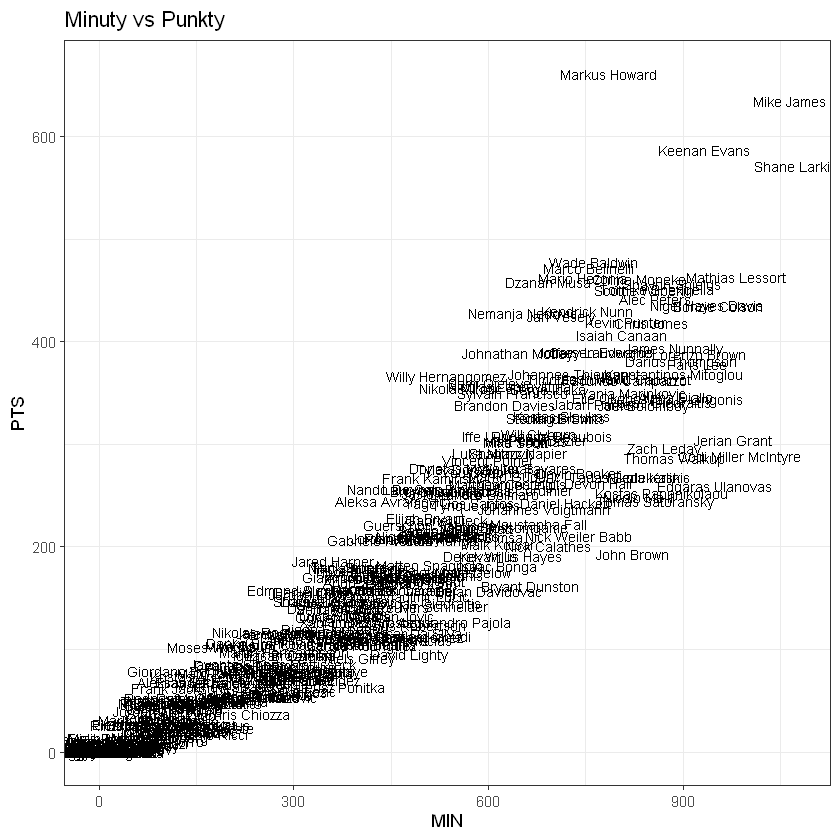

In [51]:
scatterplot(data = pbox_regular,
            data.var = c("MIN", "PTS"),
            title = "Minuty vs Punkty",
            labels = pbox_regular$Player)

In [52]:
ff <- fourfactors(TEAM = tbox_regular, OPP = obox_regular)


In [53]:
str(ff)

Classes 'fourfactors' and 'data.frame':	18 obs. of  15 variables:
 $ Team    : chr  "ALBA Berlin" "AS Monaco" "Anadolu Efes Istanbul" "Baskonia Vitoria-Gasteiz" ...
 $ POSS.Off: num  2490 2415 2464 2507 2431 ...
 $ POSS.Def: num  2494 2405 2464 2494 2423 ...
 $ PACE.Off: num  1.83 1.77 1.78 1.84 1.79 ...
 $ PACE.Def: num  1.83 1.76 1.78 1.83 1.78 ...
 $ ORtg    : num  104 115 119 114 114 ...
 $ DRtg    : num  118 112 118 116 116 ...
 $ F1.Off  : num  51.6 52.9 56 55.2 53.3 ...
 $ F2.Off  : num  20.6 14.1 14.2 16.9 16.9 ...
 $ F3.Off  : num  30.7 32.1 29.7 29.7 33.5 ...
 $ F4.Off  : num  19 22.7 19.9 22.1 21.4 ...
 $ F1.Def  : num  58.1 54.9 57.3 54.5 55.9 ...
 $ F2.Def  : num  18.1 19.1 16.8 14.7 17.1 ...
 $ F3.Def  : num  66.3 68.8 68.4 70.3 68.7 ...
 $ F4.Def  : num  19.6 21 21.5 19.5 23.6 ...


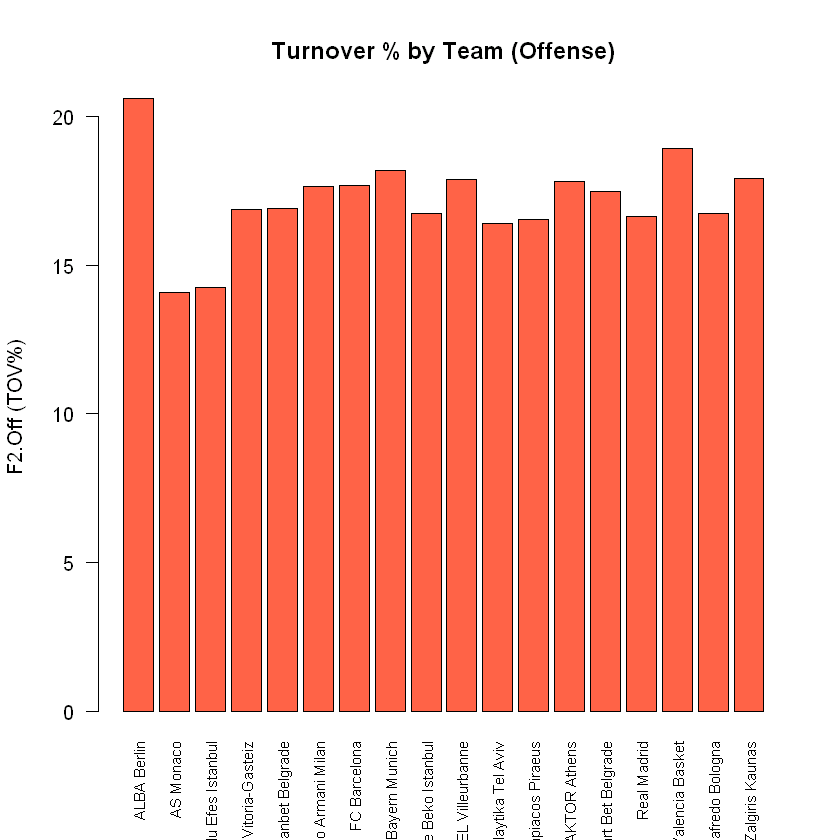

In [54]:
barplot(ff$F2.Off,
        names.arg = ff$Team,
        las = 2, col = "tomato",
        main = "Turnover % by Team (Offense)",
        ylab = "F2.Off (TOV%)",
        cex.names = 0.75)


In [55]:
ff <- ff %>%
  mutate(
    NetRating = ORtg - DRtg,
    FF_Index = 0.4 * F1.Off - 0.25 * F2.Off + 0.2 * F3.Off + 0.15 * F4.Off
  )


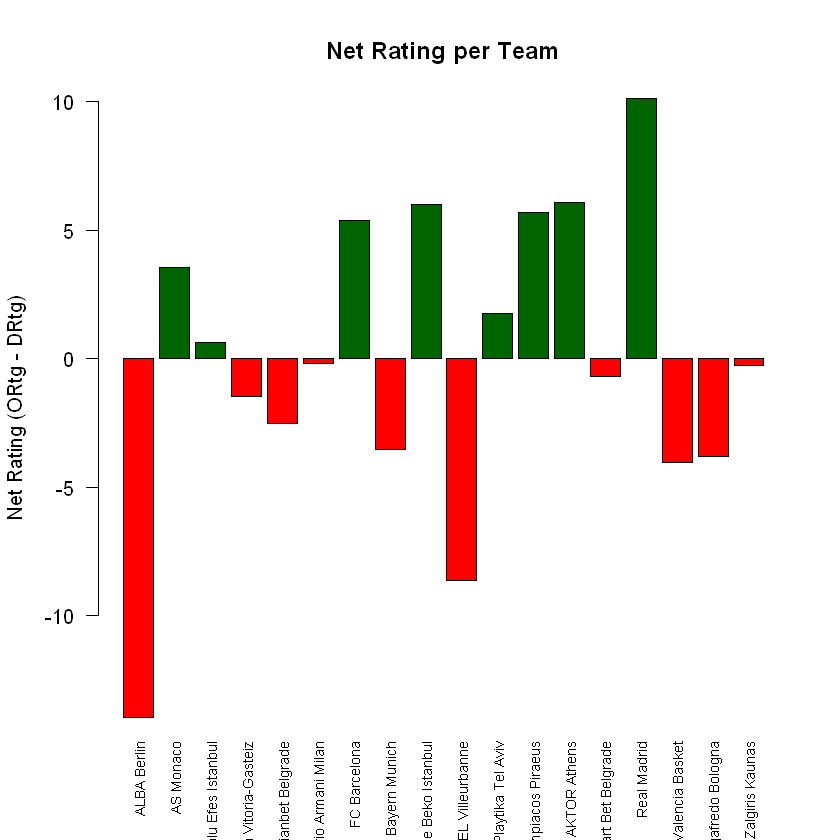

In [56]:
barplot(ff$NetRating,
        names.arg = ff$Team,
        las = 2,
        col = ifelse(ff$NetRating > 0, "darkgreen", "red"),
        main = "Net Rating per Team",
        ylab = "Net Rating (ORtg - DRtg)",
        cex.names = 0.7)


In [57]:
library(ggplot2)

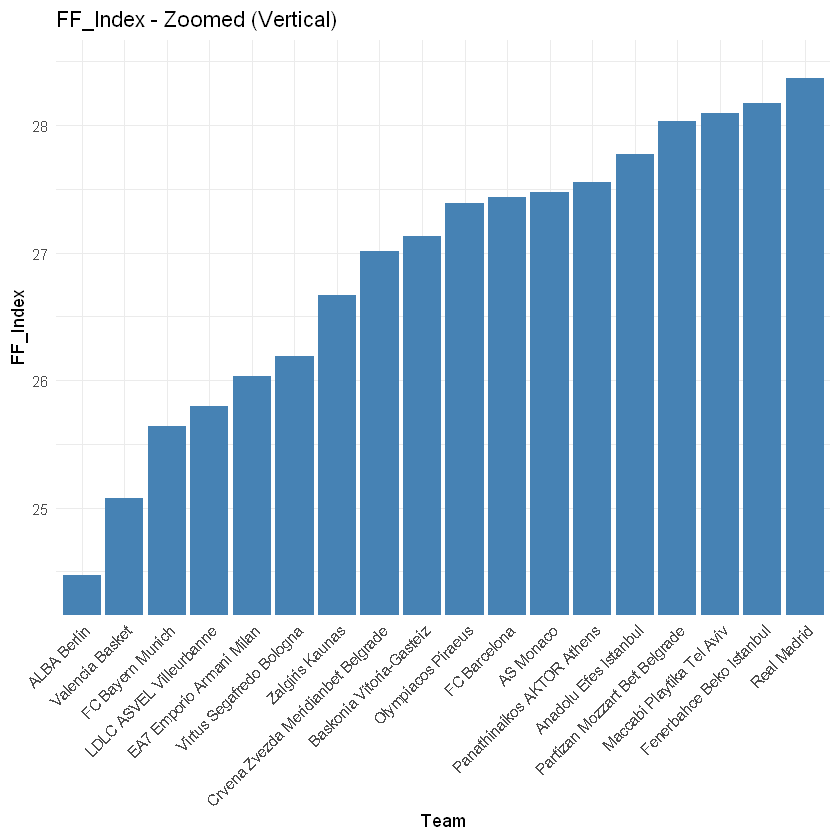

In [58]:
ggplot(ff, aes(x = reorder(Team, FF_Index), y = FF_Index)) +
  geom_col(fill = "steelblue") +
  coord_cartesian(ylim = c(min(ff$FF_Index) - 0.1, max(ff$FF_Index) + 0.1)) +
  labs(title = "FF_Index - Zoomed (Vertical)",
       x = "Team", y = "FF_Index") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [59]:
install.packages("ggforce")

library(grid)     
library(ggforce)  

Instalowanie pakietu w 'C:/Users/karol/AppData/Local/R/win-library/4.5'
(ponieważ 'lib' nie jest określony)



pakiet 'ggforce' został pomyślnie rozpakowany oraz sumy MD5 zostały sprawdzone

Pobrane pakiety binarne są w
	C:\Users\karol\AppData\Local\Temp\RtmpicuTCZ\downloaded_packages


In [65]:
shotchart_sector <- function(df, player = NULL, team = NULL) {
  filtered <- df
  if (!is.null(player)) filtered <- filtered %>% filter(Player == player)
  if (!is.null(team)) filtered <- filtered %>% filter(Team == team)
  if (nrow(filtered) == 0) stop("Brak danych po filtrowaniu.")

  zones <- data.frame(
    zone = c("RIM", "PAINT", "MID", "C3", "L3", "H3"),
    made = c(sum(filtered$RIM_M), sum(filtered$PAINT_M), sum(filtered$MID_M),
             sum(filtered$`3C_M`), sum(filtered$`3L_M`), sum(filtered$`3H_M`)),
    att = c(sum(filtered$RIM_A), sum(filtered$PAINT_A), sum(filtered$MID_A),
            sum(filtered$`3C_A`), sum(filtered$`3L_A`), sum(filtered$`3H_A`))
  ) %>%
    mutate(
      FG_perc = ifelse(att > 0, round(100 * made / att, 1), NA),
      label = ifelse(att > 0, paste0(FG_perc, "%\n(", made, "/", att, ")"), "n/a")
    )

  # Dane do geometrii
  rim <- zones %>% filter(zone == "RIM")
  paint <- zones %>% filter(zone == "PAINT")
  mid <- zones %>% filter(zone == "MID")
  c3 <- zones %>% filter(zone == "C3")
  l3 <- zones %>% filter(zone == "L3")
  h3 <- zones %>% filter(zone == "H3")

  # Pozycje etykiet
  labels <- data.frame(
    zone = c("RIM", "PAINT", "MID", "C3L", "C3R", "L3", "H3"),
    x = c(0, 0, 0, -21, 21, 0, 0),
    y = c(5, 12, 20, 3, 3, 30, 43)
  )
  label_data <- bind_rows(
    rim %>% mutate(x = 0, y = 5),
    paint %>% mutate(x = 0, y = 14),
    mid %>% mutate(x = 0, y = 23),
    c3 %>% mutate(x = -25, y = 3),
    c3 %>% mutate(x = 25, y = 3),
    l3 %>% mutate(x = 0, y = 31),
    h3 %>% mutate(x = 0, y = 41.5)
  )

  draw_court <- function() {
    list(
      # Obrys
      geom_rect(aes(xmin = -28, xmax = 28, ymin = 0, ymax = 47), fill = NA, color = "black", size = 1.2),
      geom_segment(aes(x = -28, y = 0, xend = 28, yend = 0), color = "black", size = 1.2),

      # Trumna
      geom_rect(aes(xmin = -8, xmax = 8, ymin = 0, ymax = 19), fill = NA, color = "black", size = 1.2),

      # Linia rzutów wolnych i półkole
      geom_segment(aes(x = -8, y = 19, xend = 8, yend = 19), color = "black", size = 1.2),
      geom_path(data = data.frame(
        x = 6 * cos(seq(0, pi, length.out = 100)),
        y = 6 * sin(seq(0, pi, length.out = 100)) + 19
      ), aes(x = x, y = y), color = "black", size = 1.2),

      # Półkole pod koszem
      geom_path(data = data.frame(
        x = 1.25 * cos(seq(0, pi, length.out = 100)),
        y = 1.25 * sin(seq(0, pi, length.out = 100)) + 5
      ), aes(x = x, y = y), color = "black", size = 1.2),

      # Łuk za 3
      geom_path(data = data.frame(
        x = 22.15 * cos(seq(0.1, pi - 0.1, length.out = 100)),
        y = 22.15 * sin(seq(0.1, pi - 0.1, length.out = 100)) + 5
      ), aes(x = x, y = y), color = "black", size = 1.2),

      # Corner 3
      geom_segment(aes(x = -22, y = 0, xend = -22, yend = 7.5), color = "black", size = 1.2),
      geom_segment(aes(x = 22, y = 0, xend = 22, yend = 7.5), color = "black", size = 1.2)
    )
  }

  ggplot() +
    draw_court() +

    # STREFY
geom_rect(data = rim,
  aes(xmin = -6, xmax = 6, ymin = 2, ymax = 8, fill = FG_perc),
  color = NA, alpha = 0.85) +

geom_rect(data = paint,
  aes(xmin = -6, xmax = 6, ymin = 9, ymax = 18, fill = FG_perc),
  color = NA, alpha = 0.85) +

geom_arc_bar(data = mid,
  aes(x0 = 0, y0 = 5, r0 = 15, r = 21.5,
      start = pi * (-0.5), end = pi * 0.5, fill = FG_perc),
  color = NA, alpha = 0.85) +


geom_rect(data = c3,
  aes(xmin = -28, xmax = -22, ymin = 0, ymax = 7.5, fill = FG_perc),
  color = NA, alpha = 0.85) +

geom_rect(data = c3,
  aes(xmin = 22, xmax = 28, ymin = 0, ymax = 7.5, fill = FG_perc),
  color = NA, alpha = 0.85) +

geom_arc_bar(data = l3,
  aes(x0 = 0, y0 = 5, r0 = 22.75, r = 30,
      start = pi * (-0.35), end = pi * 0.35, fill = FG_perc),
  color = NA, alpha = 0.85) +

geom_rect(data = h3,
  aes(xmin = -25, xmax = 25, ymin = 37, ymax = 46, fill = FG_perc),
  color = NA, alpha = 0.85) +

# Etykiety
geom_text(data = label_data,
  aes(x = x, y = y, label = label),
  color = "white", size = 4) +

    scale_fill_gradient(low = "red", high = "green", na.value = "grey80", name = "FG%") +
    coord_fixed(xlim = c(-28, 28), ylim = c(0, 47)) +
    theme_void() +

    theme(
       plot.title = element_text(hjust = 0, margin = margin(l = 23), size = 14),
       plot.subtitle = element_text(hjust = 0, margin = margin(l = 30), size = 11)
    ) + 
        
    labs(
      title = if (!is.null(player)) paste("Shot Chart –", player) else if
       (!is.null(team)) paste("Shot Chart –", team) else "Shot Chart – Wszyscy gracze"
    )
}


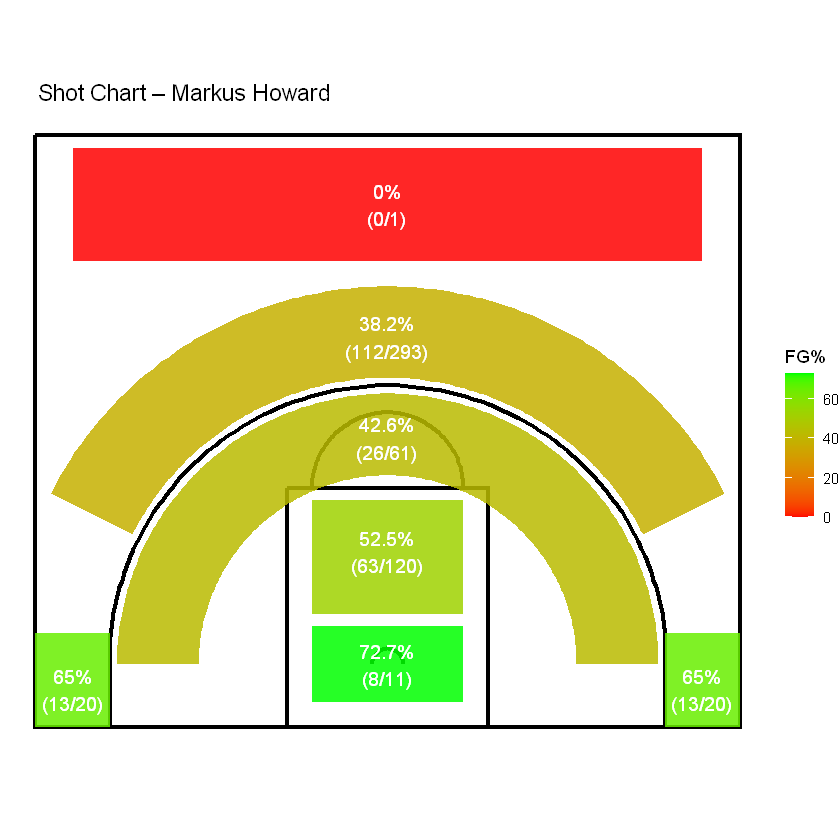

In [66]:
shotchart_sector(pbox_regular, player = "Markus Howard")

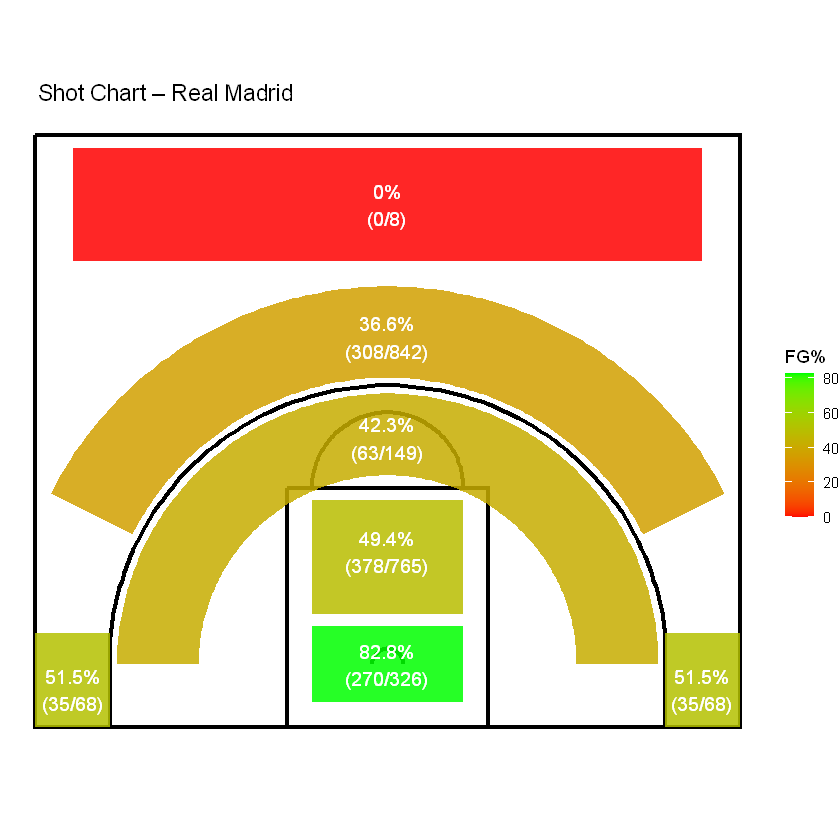

In [67]:
shotchart_sector(tbox_regular, team = "Real Madrid")